<a href="https://colab.research.google.com/github/leonnmarcoo/CCADMACL_COM232_PROJECT/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

## **Import**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Load the dataset**

In [9]:
df = pd.read_csv("cleaned_data.csv")

## **Understanding the Data**

In [10]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Action,genres_Adventure,...,director_Uwe Boll,director_Wayans,director_Wayne Wang,director_Wes Anderson,director_Wes Craven,director_William Friedkin,director_Wolfgang Petersen,director_Woody Allen,director_Zack Snyder,director_Zhang Yimou
0,5.105821,1,4.052064,2009.0,16.611528,2.442541,0.930401,8.997440,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6.652742,1,3.695201,2007.0,5.394760,2.752835,0.677927,3.085186,1,1,...,0,0,0,0,0,0,0,0,0,0
2,5.302256,1,2.698753,2015.0,4.901597,1.821953,0.172980,3.057650,1,1,...,0,0,0,0,0,0,0,0,0,0
3,5.425027,1,2.853887,2012.0,6.155692,2.575524,1.267033,6.815575,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5.670570,1,0.704659,2012.0,1.239130,1.112709,0.004664,1.160869,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Columns: 712 entries, budget to director_Zhang Yimou
dtypes: float64(7), int64(705)
memory usage: 26.1 MB


In [12]:
df.describe()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Action,genres_Adventure,...,director_Uwe Boll,director_Wayans,director_Wayne Wang,director_Wes Anderson,director_Wes Craven,director_William Friedkin,director_Wolfgang Petersen,director_Woody Allen,director_Zack Snyder,director_Zhang Yimou
count,4800.000000,4800.000000,4800.000000,4800.000000,4.800000e+03,4.800000e+03,4.800000e+03,4.800000e+03,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,0.000000,0.356667,0.000000,2002.463542,2.368476e-17,3.079019e-16,-3.730349e-16,2.368476e-17,0.240208,0.164583,...,0.001042,0.001042,0.001042,0.001458,0.002083,0.001250,0.001458,0.004375,0.001458,0.001250
std,1.000104,0.479065,1.000104,12.414304,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,0.427254,0.370843,...,0.032261,0.032261,0.032261,0.038164,0.045601,0.035337,0.038164,0.066006,0.038164,0.035337
min,-0.713550,0.000000,-0.675863,1916.000000,-5.053600e-01,-4.738551e+00,-5.128970e+00,-5.593533e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.693906,0.000000,-0.528723,1999.000000,-5.053600e-01,-5.717446e-01,-4.161259e-01,-5.156189e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.345235,0.000000,-0.269547,2005.000000,-3.875910e-01,-1.727950e-01,8.882169e-02,-3.682175e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.268622,1.000000,0.215126,2011.000000,6.524397e-02,4.921209e-01,5.937693e-01,3.774376e-02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.617087,1.000000,26.841819,2017.000000,1.661153e+01,1.024422e+01,3.286823e+00,1.057836e+01,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Data Visualization**

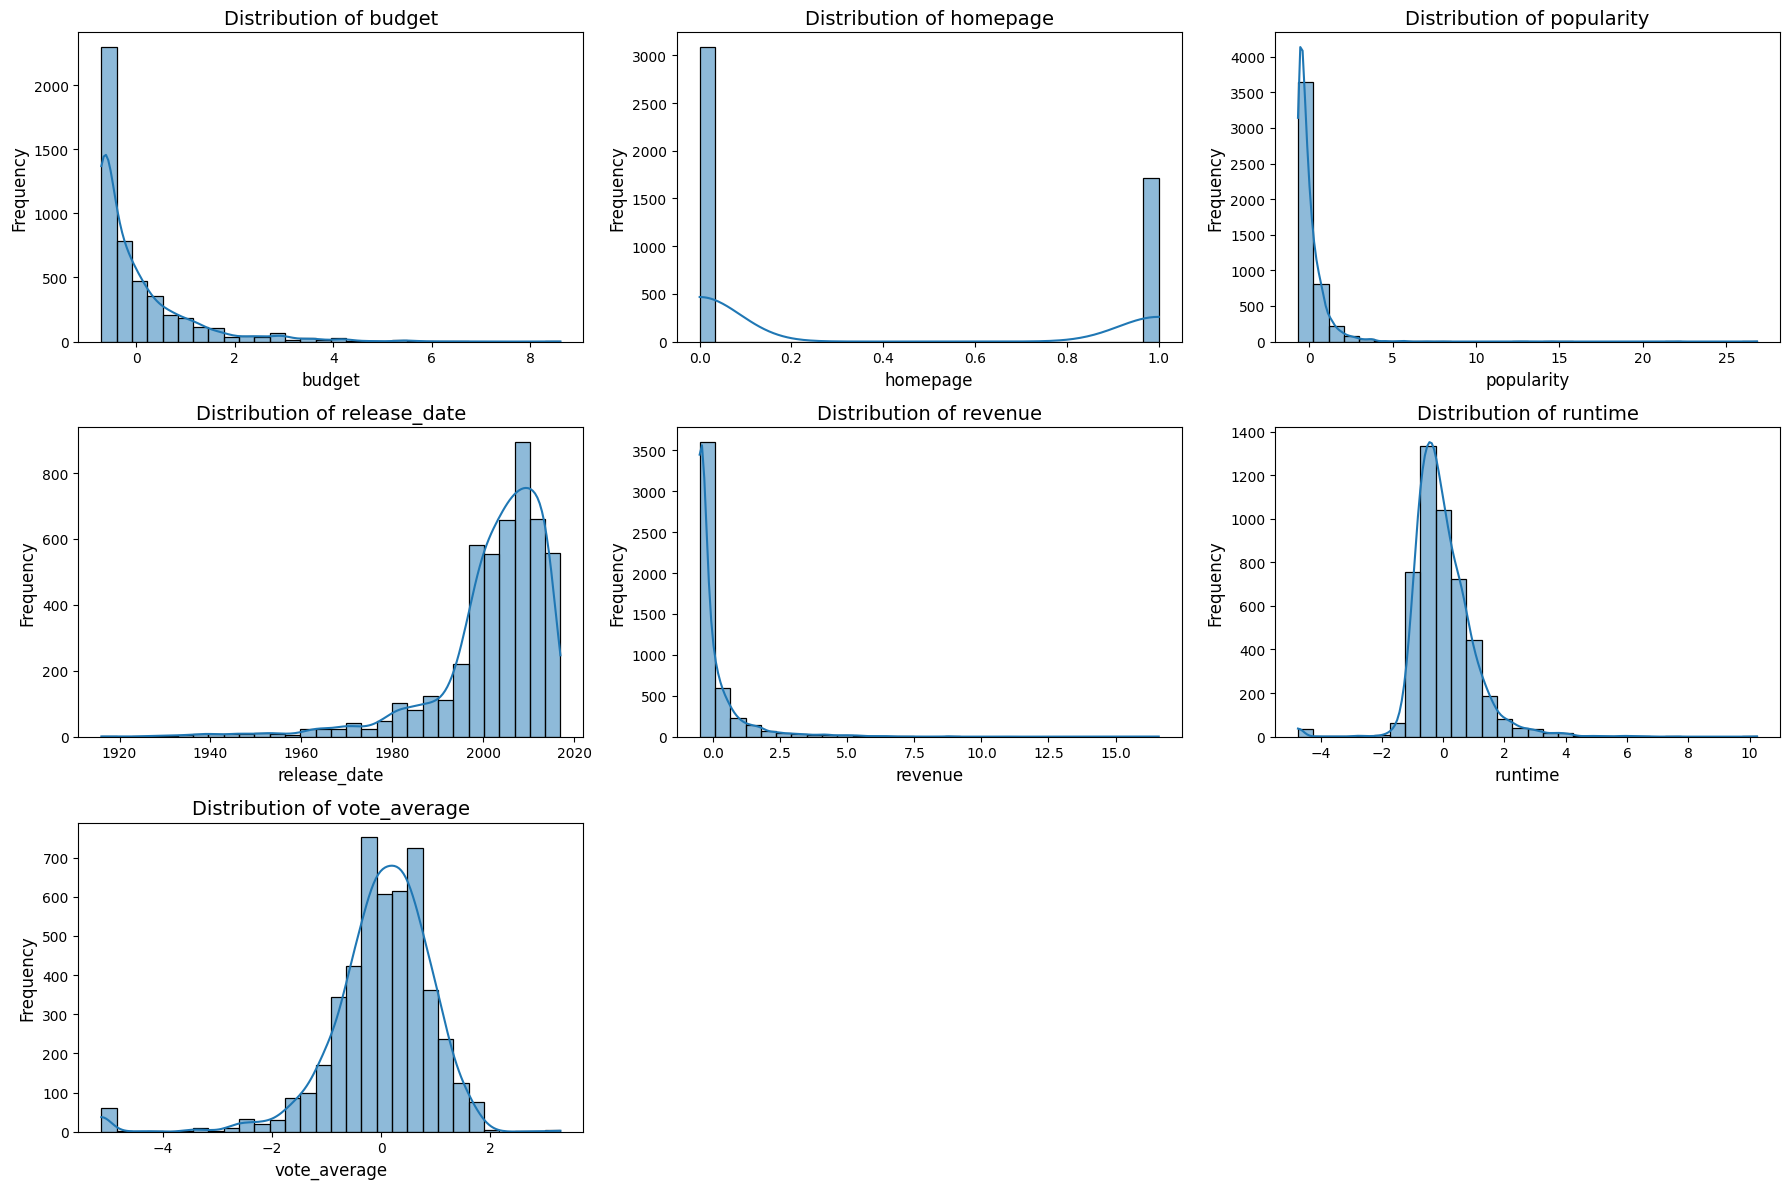

In [13]:
numerical_features = ['budget', 'homepage', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()